<a href="https://colab.research.google.com/github/asolis1994172/CienciaDatosPython/blob/main/Lab1_20000143_20000144.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab1 - Ingeniería de características

#### Denis Alexis Solis Arroyo 20 000 143
#### Marto Fredy Xam Chivalán 20 000 144

In [ ]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
# carga de datos "hotel_data.csv"
hotel = pd.read_csv("hotel_data.csv") # solo para limpieza
hotel2 = pd.read_csv("hotel_data.csv") # con campos ya imputados
hotel.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,...,No Deposit,NaN,NaN,0,Transient,NaN,0,0,Check-Out,2015-07-02


## 1. Columnas NA o Nulos

Determine que columnas poseen faltantes (NA o Nulos)

In [ ]:
# Campos que tienen NA o Nulos
camposNA = [col for col in hotel.columns if hotel[col].isnull().mean()>0]
# Tipos de datos de los campos NA o Nulos 
hotel[camposNA].dtypes

adults                  float64
children                float64
country                  object
distribution_channel     object
agent                   float64
company                 float64
adr                     float64
dtype: object

## 2. Proporción y gráfica de NA o Nulos 

Determine la proporción de faltantes para cada columna con faltantes, muestre una gráfica de barras.

In [ ]:
# Proporcion de campos nulos
camposNAprop = hotel[camposNA].isnull().mean()
camposNAprop
# company no vale la pena tiene el 94% de nulos
# country lo mejor es eliminar los datos nulos ya que no representan ni un 1%

adults                  0.149996
children                0.080032
country                 0.004087
distribution_channel    0.219993
agent                   0.136862
company                 0.943069
adr                     0.159997
dtype: float64

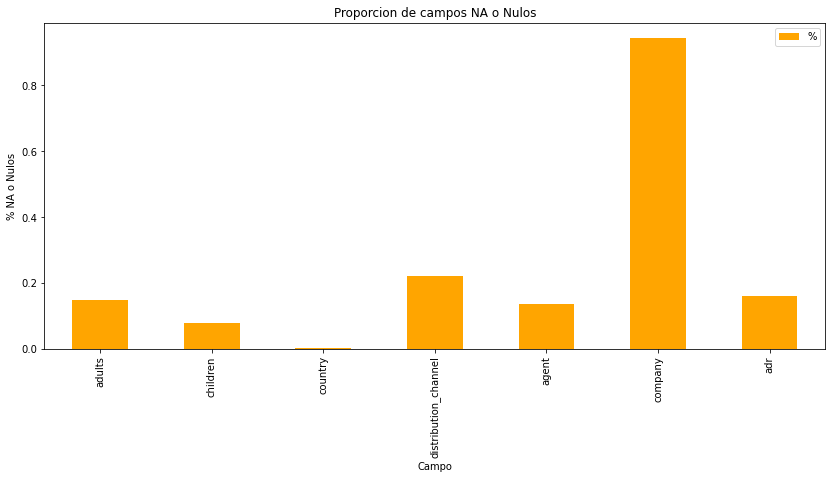

In [ ]:
dfcamposNAprop = pd.DataFrame(camposNAprop)
# gráfica
dfcamposNAprop.plot.bar(color = 'orange', figsize=(14,6))
plt.title('Proporcion de campos NA o Nulos')
plt.ylabel('% NA o Nulos')
plt.xlabel('Campo')
plt.legend('%NA')
plt.show()

## 3. Imputación Numérica

Si la variable es numérica realice un análisis de cual sería el mejor método para
realizar la imputación de datos, debe mostrar un bloque de código donde se muestre
cada imputación y su análisis. Recuerde que puede ser:

a. Eliminar los faltantes

b. Imputación de media o mediana,

c. Valores arbitrarios (extremo derecho y extremo izquierdo),

d. Generación de números aleatorios en base a la distribución (no visto en clase).

In [ ]:
# para este inciso los campos numéricos (float en este caso) son:
# 1. adults
# 2. children
# 3. agent
# 4. company #94% nulos
# 5. adr
hotel[camposNA].dtypes, camposNAprop

(adults                  float64
 children                float64
 country                  object
 distribution_channel     object
 agent                   float64
 company                 float64
 adr                     float64
 dtype: object,
 adults                  0.149996
 children                0.080032
 country                 0.004087
 distribution_channel    0.219993
 agent                   0.136862
 company                 0.943069
 adr                     0.159997
 dtype: float64)

##### Formula

In [ ]:
def impNumeric (df,campo):
# Fase 1: cálculos 
    if df[campo].isnull().mean() <0.05: 
        return print("el porcentaje de nulos es menor del 5%, \
                        por lo que es aceptable que el campo no se modifique, en este caso:", 
               round(df[campo].isnull().mean(),2))
    elif df[campo].isnull().mean() >0.70: 
        return print("eliminar este campo porque tiene más del 70% de nulos, en este caso: ",
               round(df[campo].isnull().mean(),2)) 
    else:           
        mediana = round(df[campo].median(),0)
        media = round(df[campo].mean(),0)
        arbitrarioMin = round(df[campo].min(),0)
        arbitrarioMax = round(df[campo].max(),0)
        aleatorioDist = round(random.uniform(df[campo].min(), df[campo].max()),0)   

        print("")
        print('Resultados:')
        print('el valor de la mediana es: ',mediana)
        print('el valor de la media es: ',media)
        print('el valor arbitrario mínimo es: ', arbitrarioMin)
        print('el valor arbitrario máximo es: ', arbitrarioMax)
        print('el valor aleatorio de la distribución es: ', aleatorioDist)

# Fase 2: agregar campos y varianza
        df[campo+"_mediana"] = df[campo].fillna(mediana)
        df[campo+"_media"] = df[campo].fillna(media)
        df[campo+"_arbitrarioMin"] = df[campo].fillna(arbitrarioMin)
        df[campo+"_arbitrarioMax"] = df[campo].fillna(arbitrarioMax)
        df[campo+"_aleatorioDist"] = df[campo].fillna(aleatorioDist)

        print("")
        print('Varianza:')
        print("Varianza original sin NA: ", round(df[campo+"_mediana"].dropna().var(),2))
        print("Varianza mediana: ", round(df[campo+"_mediana"].var(),2))
        print("Varianza media: ", round(df[campo+"_media"].var(),2))
        print("Varianza arbitrario mínimo: ", round(df[campo+"_arbitrarioMin"].var(),2))
        print("Varianza arbitrario máximo: ", round(df[campo+"_arbitrarioMax"].var(),2))
        print("Varianza aleatorio de la ditribución: ", round(df[campo+"_aleatorioDist"].var(),2))
    
# Fase 3: Scalar
        df2 = df[[campo
                , campo+"_mediana" 
                , campo+"_media"
                , campo+"_arbitrarioMin"
                , campo+"_arbitrarioMax"
                , campo+"_aleatorioDist"
                ]]

        scaler = StandardScaler() # creamos objeto Scaler
        scaler.fit(df2) # calcularmos sacler para cada columna

        df2_scaled = scaler.transform(df2)
        df2_scaled = pd.DataFrame(df2_scaled, columns = df2.columns)
    
# Fase 4: Grafica Histograma Scalar (con y sin)
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (14,6))

        ax1.set_title("Sin Escala")
        sns.kdeplot(df2[campo], ax=ax1, label = 'Original')
        sns.kdeplot(df2[campo+"_mediana"], ax=ax1, label = 'Input mediana')
        sns.kdeplot(df2[campo+"_media"], ax=ax1, label = 'Input media')
        sns.kdeplot(df2[campo+"_arbitrarioMin"], ax=ax1, label = 'Input arbitratioMin')
        sns.kdeplot(df2[campo+"_arbitrarioMax"], ax=ax1, label = 'Input arbitratioMax')
        sns.kdeplot(df2[campo+"_aleatorioDist"], ax=ax1, label = 'Input aleagorioDist')

        ax2.set_title("Con Escala")
        sns.kdeplot(df2_scaled[campo], ax=ax2, label = 'Original')
        sns.kdeplot(df2_scaled[campo+"_mediana"], ax=ax2, label = 'Input mediana')
        sns.kdeplot(df2_scaled[campo+"_media"], ax=ax2, label = 'Input media')
        sns.kdeplot(df2_scaled[campo+"_arbitrarioMin"], ax=ax2, label = 'Input arbitratioMin')
        sns.kdeplot(df2_scaled[campo+"_arbitrarioMax"], ax=ax2, label = 'Input arbitratioMax')
        sns.kdeplot(df2_scaled[campo+"_aleatorioDist"], ax=ax2, label = 'Input aleagorioDist')

        ax1.legend()
        ax2.legend()
        plt.show()       
        
# Fase 5: Grafica Boxplot Scalar (con y sin)
        fig1, ax1 = plt.subplots(ncols=1, figsize = (14,6))
        ax1.set_title("Sin Escala")
        df2.boxplot(color = 'orange', ax = ax1)
        plt.show()
        
        fig1, ax2 = plt.subplots(ncols=1, figsize = (14,6))
        ax2.set_title("Con Escala")
        df2_scaled.boxplot(color = 'orange', ax = ax2)
        plt.show()

##### Aplicacion de la formula


Resultados:
el valor de la mediana es:  2.0
el valor de la media es:  2.0
el valor arbitrario mínimo es:  0.0
el valor arbitrario máximo es:  50.0
el valor aleatorio de la distribución es:  21.0

Varianza:
Varianza original sin NA:  0.28
Varianza mediana:  0.28
Varianza media:  0.28
Varianza arbitrario mínimo:  0.72
Varianza arbitrario máximo:  295.79
Varianza aleatorio de la ditribución:  47.0


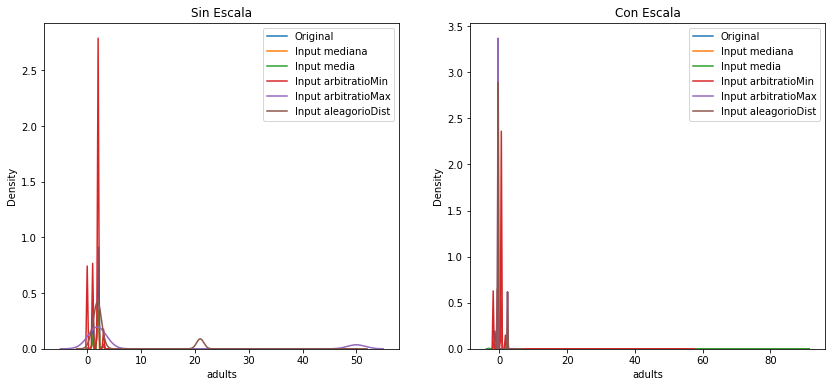

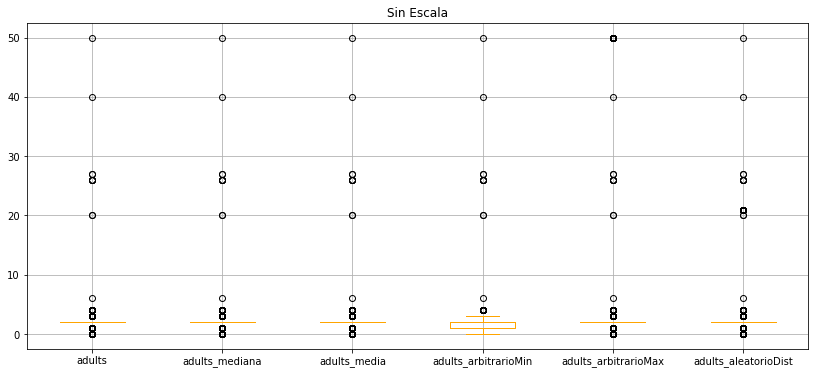

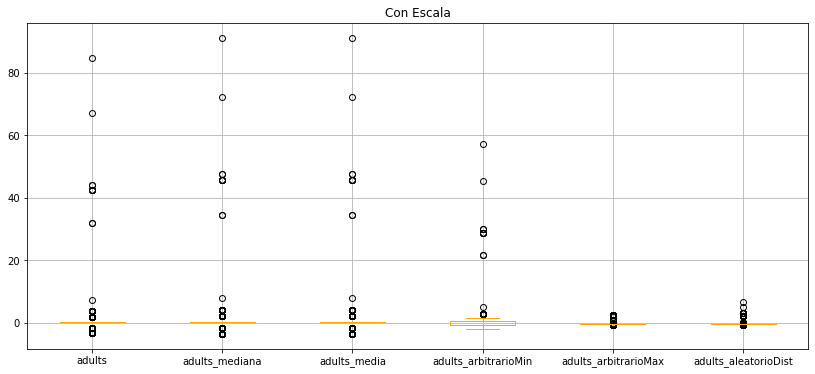

In [ ]:
impNumeric(hotel, 'adults')
hotel2['adults'] = hotel2['adults'].fillna(round(hotel2['adults'].median(),0))

# Analisis de la variable
# Para esta variable la imputación adecuada es la mediana o la media que es
# representada con el valor de 2, el cual genera una varianza de 0.28 similar a la 
# generada por la data original que no incluye registros NA y también es similar
# a la distribución que muestran en el histograma y en especial en boxplot.
# Nota: 
# El valor y la varianza generada por el método aleatorio de la distribución,
# no se está considerando ya que puede ser que en una ocasión sea similar a la media o
# mediana y en otros casos puede estar total mente disperso, lo cual impacta, 
# negativamente en el modelo de análisis.


Resultados:
el valor de la mediana es:  0.0
el valor de la media es:  0.0
el valor arbitrario mínimo es:  0.0
el valor arbitrario máximo es:  10.0
el valor aleatorio de la distribución es:  0.0

Varianza:
Varianza original sin NA:  0.15
Varianza mediana:  0.15
Varianza media:  0.15
Varianza arbitrario mínimo:  0.15
Varianza arbitrario máximo:  7.36
Varianza aleatorio de la ditribución:  0.15


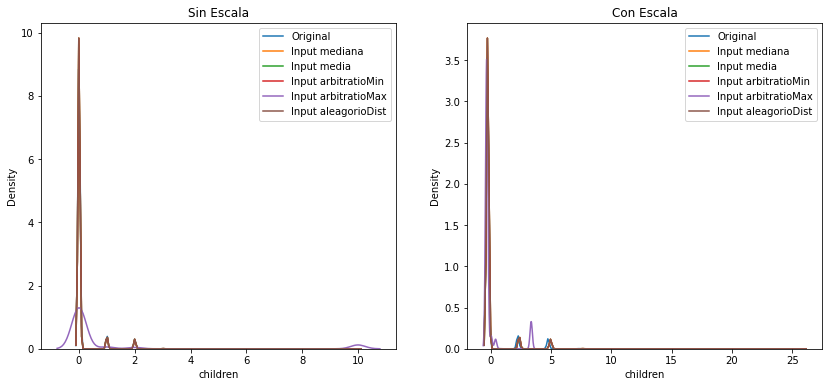

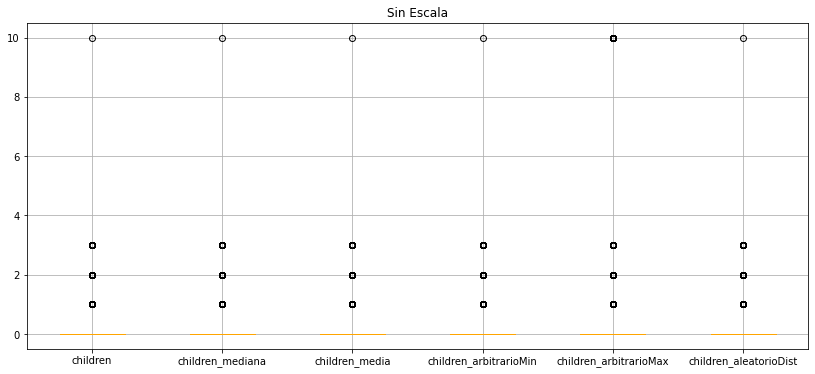

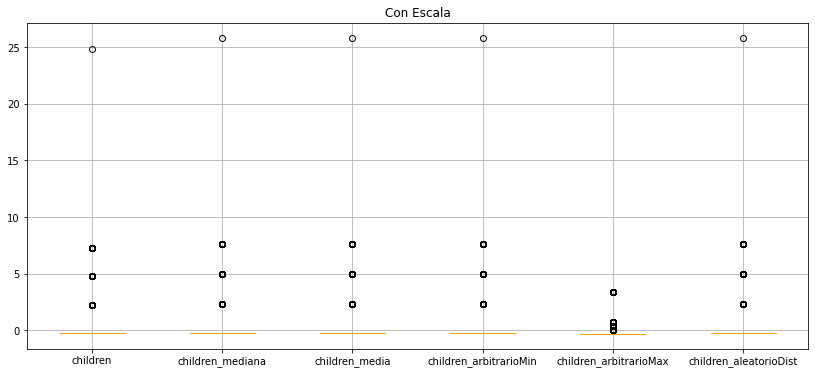

In [ ]:
impNumeric(hotel, 'children')
hotel2['children'] = hotel2['children'].fillna(round(hotel2['children'].median(),0))

# Analisis de la variable
# Para esta variable la imputación adecuada es la mediana o la media que es
# representada con el valor de 0, que en esta ocasión también es igual al valor mínimo,
# los cuales genera una varianza de 0.15 similar a la 
# generada por la data original que no incluye registros NA y también es similar
# a la distribución que muestran en el histograma y en especial en boxplot.
# Nota: 
# El valor y la varianza generada por el método aleatorio de la distribución,
# no se está considerando ya que puede ser que en una ocasión sea similar a la media o
# mediana y en otros casos puede estar total mente disperso, lo cual impacta, 
# negativamente en el modelo de análisis.


Resultados:
el valor de la mediana es:  14.0
el valor de la media es:  87.0
el valor arbitrario mínimo es:  1.0
el valor arbitrario máximo es:  535.0
el valor aleatorio de la distribución es:  457.0

Varianza:
Varianza original sin NA:  11215.8
Varianza mediana:  11215.8
Varianza media:  10591.56
Varianza arbitrario mínimo:  11459.03
Varianza arbitrario máximo:  34333.59
Varianza aleatorio de la ditribución:  26790.64


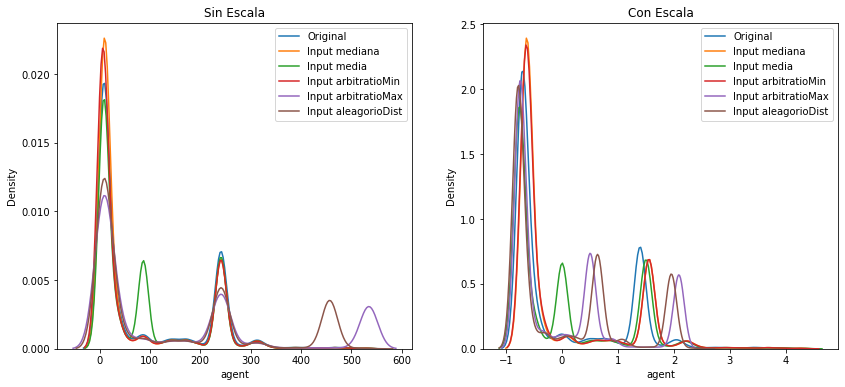

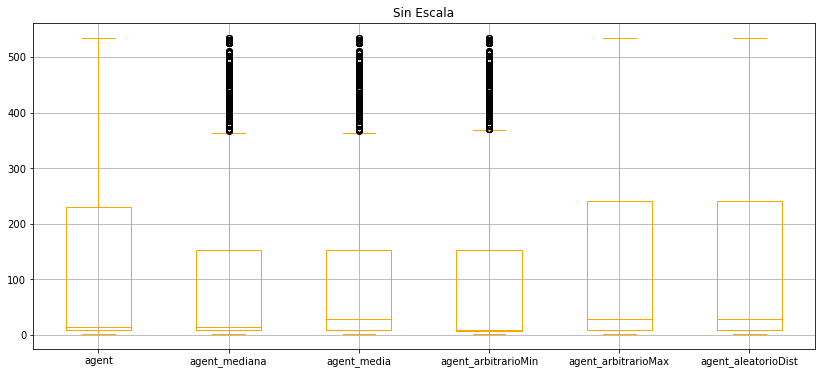

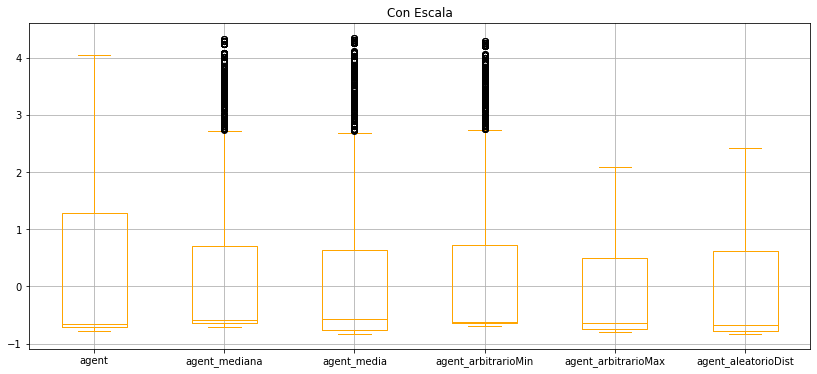

In [ ]:
impNumeric(hotel, 'agent')
hotel2['agent'] = hotel2['agent'].fillna(round(hotel2['agent'].median(),0))

# Analisis de la variable
# Para esta variable la imputación adecuada es la mediana que es
# representada con el valor de 14,
# el cual genera una varianza de 11,215.80 similar a la 
# generada por la data original que no incluye registros NA y también es similar
# a la distribución que muestran en el histograma y en especial en boxplot.
# Nota: 
# El valor y la varianza generada por el método aleatorio de la distribución,
# no se está considerando ya que puede ser que en una ocasión sea similar a la media o
# mediana y en otros casos puede estar total mente disperso, lo cual impacta, 
# negativamente en el modelo de análisis.

In [ ]:
impNumeric(hotel, 'company')
hotel2.drop('company', axis= 'columns', inplace = True)

eliminar este campo porque tiene más del 70% de nulos, en este caso:  0.94



Resultados:
el valor de la mediana es:  94.0
el valor de la media es:  102.0
el valor arbitrario mínimo es:  -6.0
el valor arbitrario máximo es:  5400.0
el valor aleatorio de la distribución es:  2331.0

Varianza:
Varianza original sin NA:  2203.43
Varianza mediana:  2203.43
Varianza media:  2194.95
Varianza arbitrario mínimo:  3760.94
Varianza arbitrario máximo:  3774690.2
Varianza aleatorio de la ditribución:  669981.49


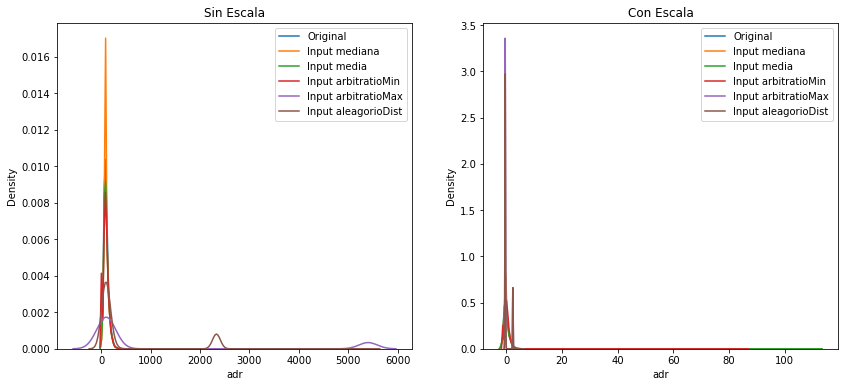

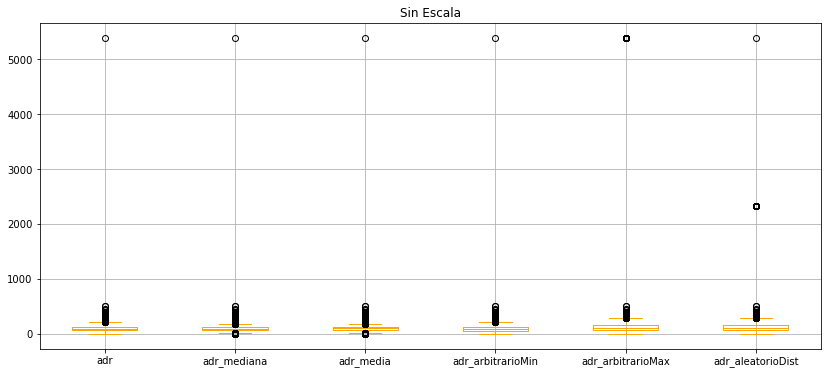

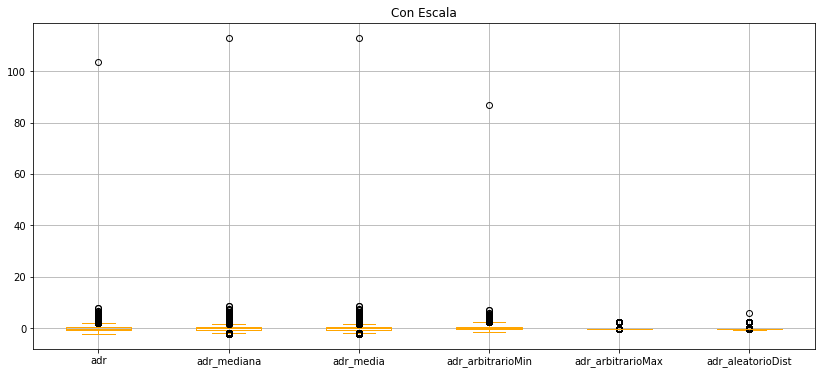

In [ ]:
impNumeric(hotel, 'adr')
hotel2['adr'] = hotel2['adr'].fillna(round(hotel2['adr'].median(),0))

# Analisis de la variable
# Para esta variable la imputación adecuada es la mediana que es
# representada con el valor de 94,
# el cual genera una varianza de 2,203.43 similar a la 
# generada por la data original que no incluye registros NA y también es similar
# a la distribución que muestran en el histograma y en especial en boxplot.
# Nota: 
# El valor y la varianza generada por el método aleatorio de la distribución,
# no se está considerando ya que puede ser que en una ocasión sea similar a la media o
# mediana y en otros casos puede estar total mente disperso, lo cual impacta, 
# negativamente en el modelo de análisis.

## 4. Imputación Categórica

Si la variable es categórica, realice una imputación que considere necesaria.

In [ ]:
# para este inciso los campos categóricos (object en este caso) son:
# 1. country
# 2. distribution_channel
hotel[camposNA].dtypes, camposNAprop

(adults                  float64
 children                float64
 country                  object
 distribution_channel     object
 agent                   float64
 company                 float64
 adr                     float64
 dtype: object,
 adults                  0.149996
 children                0.080032
 country                 0.004087
 distribution_channel    0.219993
 agent                   0.136862
 company                 0.943069
 adr                     0.159997
 dtype: float64)

In [ ]:
def impCategoric (df,campo, valor):
# Fase 1: cálculos 
    if df[campo].isnull().mean() <0.05: 
        return print("el porcentaje de nulos es menor del 5%, \
                        por lo que es aceptable que el campo no se modifique, en este caso:", 
               round(df[campo].isnull().mean(),2))
    elif df[campo].isnull().mean() >0.70: 
        return print("eliminar este campo porque tiene más del 70% de nulos, en este caso: ",
               round(df[campo].isnull().mean(),2)) 
    else:
        print("la cantidad de nulos a imputar es de: ", round(df[campo].isnull().sum(),0))
        print("")
        
        # Fase 1: Cálculos
        Freq = df[campo].value_counts().sort_values(ascending=True)
        Freqdf = pd.DataFrame(Freq)
        print(Freqdf)

        unicos = df[campo].explode().unique()
        unicos = [x for x in unicos if str(x) != 'nan']

        # Fase 2: Grafica lineas
        cio = []
        coma1 = """ '"""
        coma2 = """' """

        for n in (unicos):
            cio.append(
                'df[df[campo]=={}{}{}][{}{}{}].plot(kind= {}{}{} , ax=ax, label= {}{}{})'.
                format(coma1, n, coma2, coma1, valor, coma2, coma1, 'kde', coma2, coma1, n, coma2))

        codigo = ""
        for i in cio:
            codigo += str(i) + "\n"
        codigo = codigo[:-1]

        fig =plt.figure()
        ax =fig.add_subplot(111)
        exec(codigo)
        df[df[campo].isnull()][valor].plot(kind='kde', ax=ax, label="NA")
        ax.legend()
        plt.show()

        # Fase 3: Gráfica de barras
        Freq.plot.bar()
        plt.show()
        

la cantidad de nulos a imputar es de:  26265

           distribution_channel
Undefined                     3
GDS                         146
Corporate                  5201
Direct                    11443
TA/TO                     76332


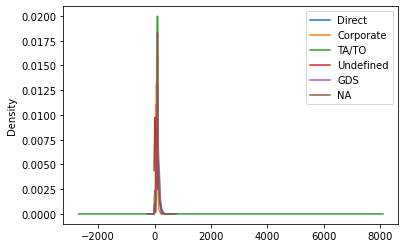

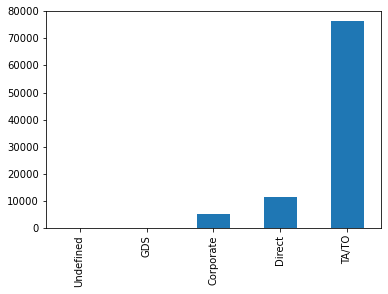

In [ ]:
impCategoric(hotel, 'distribution_channel', 'adr_media' )
hotel2['distribution_channel'].fillna('TA/TO', inplace = True)
# Analisis de la variable
# Para esta variable la imputación para los NA el método adecuado por frecuencia que es la variable "TA/TO"

In [ ]:
hotel2.head(5)
#hotel2[camposNA].dtypes

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,...,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,...,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,...,0,No Deposit,14.0,0,Transient,94.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1.0,...,0,No Deposit,304.0,0,Transient,94.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,0,No Deposit,240.0,0,Transient,94.0,0,1,Check-Out,2015-07-03


In [ ]:
# Campos Nulos pendientes de Imputar
camposNA2 = [col for col in hotel2.columns if hotel2[col].isnull().mean()>0]
hotel2[camposNA2].dtypes

country    object
dtype: object

## Codificación de variables categóricas

Realice la codificación de variables categóricas, determine cual es le mejor enfoque
para cada caso, recuerde que puede realizar los siguientes enfoques:
    a. One Hote Encodign.
    b. Codificación por Frecuencia.
    c. Codificación por Densidad.

#### Comparacion de datos originales vs datos ya imputados

In [ ]:
# Data set con datos procesables 
hotelProc = [col for col in hotel2.columns if hotel2[col].isnull().mean()<.05]
hotel3 = hotel2[hotelProc].dropna() # Se eliminan líneas y columnas nulls, hotel 3 para codificación
hoteloriginal = pd.read_csv("hotel_data.csv")

# Comparacion de datos originales vs datos ya imputados
shape_hoteloriginal = (hoteloriginal.shape)
shape_hotel3 = (hotel3.shape)

print('Resultado de la Imputación: \n')
print('Se eliminaron {} filas y {} columna del dataset original. \n'.
     format(shape_hoteloriginal[0]-shape_hotel3[0], shape_hoteloriginal[1]-shape_hotel3[1]))

print('El dataset original tiene {} filas y {} columnas.'.
      format(shape_hoteloriginal[0], shape_hoteloriginal[1]))

print('El dataset para codificación categórica tiene {} filas y {} columnas.'.
      format(shape_hotel3[0], shape_hotel3[1]))

Resultado de la Imputación: 

Se eliminaron 488 filas y 1 columna del dataset original. 

El dataset original tiene 119390 filas y 32 columnas.
El dataset para codificación categórica tiene 118902 filas y 31 columnas.


#### Codificación fechas

In [ ]:
# Campo 'reservation_status_date' = Fecha
hotel3['reservation_status_date'] = pd.to_datetime(hotel3['reservation_status_date']) 
# Campo 'arrival_date_month' = Mes 
hotel3['arrival_date_month'] = pd.to_datetime(hotel3['arrival_date_month'], format = '%B').dt.month

#### Codificación str

In [ ]:
# Codificación str
hotel3str = hotel3.select_dtypes(include='object') # dataset solo str
hotel3list = hotel3str.columns.values.tolist() #hotel3list
hotelp2 = hotel3

# Cantidad de variables por cada Campo str
for columnName in hotel3str.columns:
    print(columnName, ":", len(hotel3str[columnName].unique()))

hotel : 2
meal : 5
country : 177
market_segment : 8
distribution_channel : 5
reserved_room_type : 10
assigned_room_type : 12
deposit_type : 3
customer_type : 4
reservation_status : 3


#### Función

In [ ]:
def CodCat (df, campo):    
    # Variables y frecuencia de un campo
    campoVariables = df[campo].value_counts().sort_values(ascending = False)
    cantidad = len(df[campo].unique())
    print("la cantidad de valores distintos para la variable son: ", len(df[campo].unique()))
    
    if cantidad<20:
        # codifiacion por densidad
        density_map = df[campo].value_counts().sort_values(ascending = False) / len(df[campo])
        print('se utiliza el método de densidad para codificar las variables del campo {}: \n'.format(campo))
        print(density_map, "\n")
        df[campo+"_encod"] = df[campo].map(density_map)
    else:
        # codifiacion por frecuencia
        freq_map = (df[campo].value_counts().sort_values(ascending = False)).to_dict()
        print('se utiliza el método de frecuencia para codificar las variables del campo {}: \n'.format(campo))
        print(freq_map, "\n")
        df[campo+"_encod"] = df[campo].map(freq_map)
    
    # Eliminar campo original
    df.drop(campo, axis= 'columns', inplace = True)
    print("\n")

#### Ejecución de función

In [ ]:
for i in hotel3list:
    CodCat(hotel3, i)

la cantidad de valores distintos para la variable son:  2
se utiliza el método de densidad para codificar las variables del campo hotel: 

City Hotel      0.666986
Resort Hotel    0.333014
Name: hotel, dtype: float64 



la cantidad de valores distintos para la variable son:  5
se utiliza el método de densidad para codificar las variables del campo meal: 

BB           0.772628
HB           0.121394
SC           0.089469
Undefined    0.009798
FB           0.006711
Name: meal, dtype: float64 



la cantidad de valores distintos para la variable son:  177
se utiliza el método de frecuencia para codificar las variables del campo country: 

{'PRT': 48590, 'GBR': 12129, 'FRA': 10415, 'ESP': 8568, 'DEU': 7287, 'ITA': 3766, 'IRL': 3375, 'BEL': 2342, 'BRA': 2224, 'NLD': 2104, 'USA': 2097, 'CHE': 1730, 'CN': 1279, 'AUT': 1263, 'SWE': 1024, 'CHN': 999, 'POL': 919, 'ISR': 669, 'RUS': 632, 'NOR': 607, 'ROU': 500, 'FIN': 447, 'DNK': 435, 'AUS': 426, 'AGO': 362, 'LUX': 287, 'MAR': 259, 'TUR': 248, '

## Feature Scaling

Para todas las variables resultantes realice Feature Scaling según lo considere más
pertinente.

#### Función

In [ ]:
def fscalar (df, lcampos):
    
    # Fase 1: Scalar
        scaler = StandardScaler() # creamos objeto Scaler
        scaler.fit(df) # calcularmos sacler para cada columna

        df_scaled = scaler.transform(df)
        df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
    
    # Fase 2: Cálculos sin scala
        cio1 = []
        coma1 = """ '"""
        coma2 = """' """

        for n in (lcampos):
            cio1.append(
                'sns.kdeplot(df[{}{}{}], ax=ax1, label = {}{}{})'.
                format(coma1, n, coma2, coma1, n, coma2))
    
        codigo1 = ""
        for i in cio1:
            codigo1 += str(i) + "\n"
        codigo1 = codigo1[:-1]
    
    # Fase 3: Cálculos con scala
        cio2 = []
        coma1 = """ '"""
        coma2 = """' """

        for n in (lcampos):
            cio2.append(
                'sns.kdeplot(df_scaled[{}{}{}], ax=ax2, label = {}{}{})'.
                format(coma1, n, coma2, coma1, n, coma2))
    
        codigo2 = ""
        for i in cio2:
            codigo2 += str(i) + "\n"
        codigo2 = codigo2[:-1]

    # Fase 4: Gráfica
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (14,6))

        ax1.set_title("Sin Escala")
        exec(codigo1)

        ax2.set_title("Con Escala")
        exec(codigo2)

        ax1.legend()
        ax2.legend()
        plt.show()   
        
        return df_scaled

#### Datos

In [ ]:
# Dataset para feature scaling
datasetx = hotel3

In [ ]:
# el campo fecha se eliminó del dataset para poder realizar el feature scaling
dataset = datasetx.drop('reservation_status_date', axis= 'columns')

In [ ]:
# campos a escarlar
camposScalar = ['adults' # imputación numerica por mediana
                , 'distribution_channel_encod' # imputación categórica por frecuencia
                , 'hotel_encod' # codificación por densidad
                , 'country_encod' # codifiación por frecuencia
                , 'lead_time' # variable sin modificar
               ]
camposScalar

['adults',
 'distribution_channel_encod',
 'hotel_encod',
 'country_encod',
 'lead_time']

#### Resultado de feature scaling

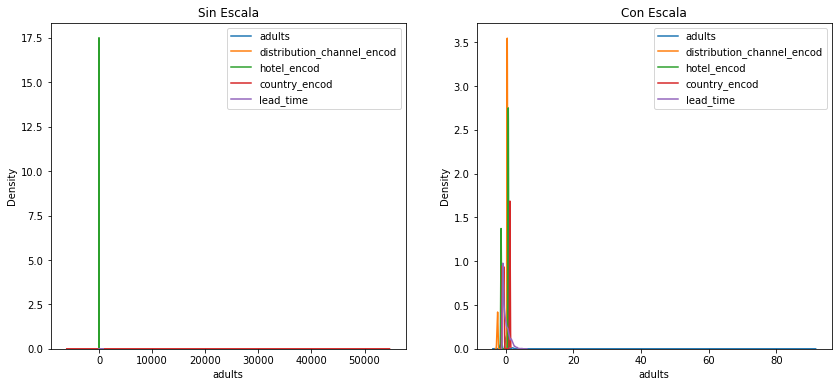

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,hotel_encod,meal_encod,country_encod,market_segment_encod,distribution_channel_encod,reserved_room_type_encod,assigned_room_type_encod,deposit_type_encod,customer_type_encod,reservation_status_encod
0,-0.768615,2.223443,-1.636264,0.144822,-0.012269,-1.685650,-0.932428,-1.316805,0.227932,-0.250131,...,-1.415231,0.541785,1.187598,-1.235449,-2.424997,-1.950234,-1.726424,0.376046,0.572305,0.743822
1,-0.768615,5.918392,-1.636264,0.144822,-0.012269,-1.685650,-0.932428,-1.316805,0.227932,-0.250131,...,-1.415231,0.541785,1.187598,-1.235449,-2.424997,-1.950234,-1.726424,0.376046,0.572305,0.743822
2,-0.768615,-0.910249,-1.636264,0.144822,-0.012269,-1.685650,-0.932428,-0.790533,-1.669934,-0.250131,...,-1.415231,0.541785,-0.541461,-1.235449,-2.424997,0.619030,-1.726424,0.376046,0.572305,0.743822
3,-0.768615,-0.854123,-1.636264,0.144822,-0.012269,-1.685650,-0.932428,-0.790533,-1.669934,-0.250131,...,-1.415231,0.541785,-0.541461,-1.612511,-2.619403,0.619030,0.761398,0.376046,0.572305,0.743822
4,-0.768615,-0.844769,-1.636264,0.144822,-0.012269,-1.685650,-0.932428,-0.264260,0.227932,-0.250131,...,-1.415231,0.541785,-0.541461,1.023123,0.401505,0.619030,0.761398,0.376046,0.572305,0.743822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118897,-0.768615,-0.760580,1.190688,0.468762,0.576412,1.617186,1.075187,1.314557,0.227932,-0.250131,...,0.706598,0.541785,-1.005582,-0.633681,0.401505,0.619030,0.761398,0.376046,0.572305,0.743822
118898,-0.768615,-0.021590,1.190688,0.468762,0.576412,1.731077,1.075187,1.314557,2.125797,-0.250131,...,0.706598,0.541785,-0.622743,1.023123,0.401505,-1.781336,-1.539113,0.376046,0.572305,0.743822
118899,-0.768615,-0.657683,1.190688,0.468762,0.576412,1.731077,1.075187,1.314557,0.227932,-0.250131,...,0.706598,0.541785,-0.771079,1.023123,0.401505,-1.396690,-0.932787,0.376046,0.572305,0.743822
118900,-0.768615,0.043890,1.190688,0.468762,0.576412,1.731077,1.075187,1.314557,0.227932,-0.250131,...,0.706598,0.541785,-0.541461,1.023123,0.401505,0.619030,0.761398,0.376046,0.572305,0.743822


In [ ]:
fscalar(dataset, camposScalar)

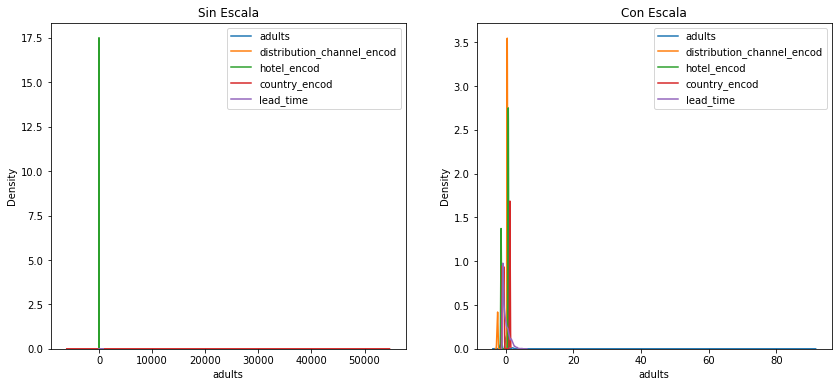

In [ ]:
dataset_scaled = fscalar(dataset, camposScalar)

In [ ]:
dataset_scaled.to_csv('DataScaled.csv')

------

#### End